# 01. Preprocessing

Cargar, explorar, limpiar y dividir los datos de German Credit Risk

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# warnings filter
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

REPORT_IMG_DIR = "../report/images"
os.makedirs(REPORT_IMG_DIR, exist_ok=True)

## 1. Cargar Datos

In [10]:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
column_names = [
    'Status_Checking_Account', 'Duration_in_Months', 'Credit_History', 'Purpose',
    'Credit_Amount', 'Savings_Account', 'Present_Employment_Since', 'Installment_Rate',
    'Personal_Status_Sex', 'Other_Debtors', 'Present_Residence_Since', 'Property', 'Age',
    'Other_Installment_Plans', 'Housing', 'Number_Existing_Credits', 'Job',
    'Number_People_Liable', 'Telephone', 'Foreign_Worker', 'Target'
]
df = pd.read_csv(url, sep=' ', header=None, names=column_names)


## 2. Mapping

In [11]:
# Target Mapping: 1 (Good) -> 0, 2 (Bad) -> 1
df['Target'] = df['Target'].map({1: 0, 2: 1})
print(df.head())

  Status_Checking_Account  Duration_in_Months Credit_History Purpose  \
0                     A11                   6            A34     A43   
1                     A12                  48            A32     A43   
2                     A14                  12            A34     A46   
3                     A11                  42            A32     A42   
4                     A11                  24            A33     A40   

   Credit_Amount Savings_Account Present_Employment_Since  Installment_Rate  \
0           1169             A65                      A75                 4   
1           5951             A61                      A73                 2   
2           2096             A61                      A74                 2   
3           7882             A61                      A74                 2   
4           4870             A61                      A73                 3   

  Personal_Status_Sex Other_Debtors  ...  Property Age  \
0                 A93          A10

## 3. Comprobar distribuciones

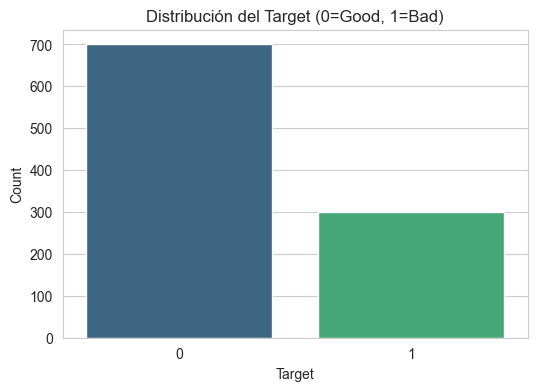

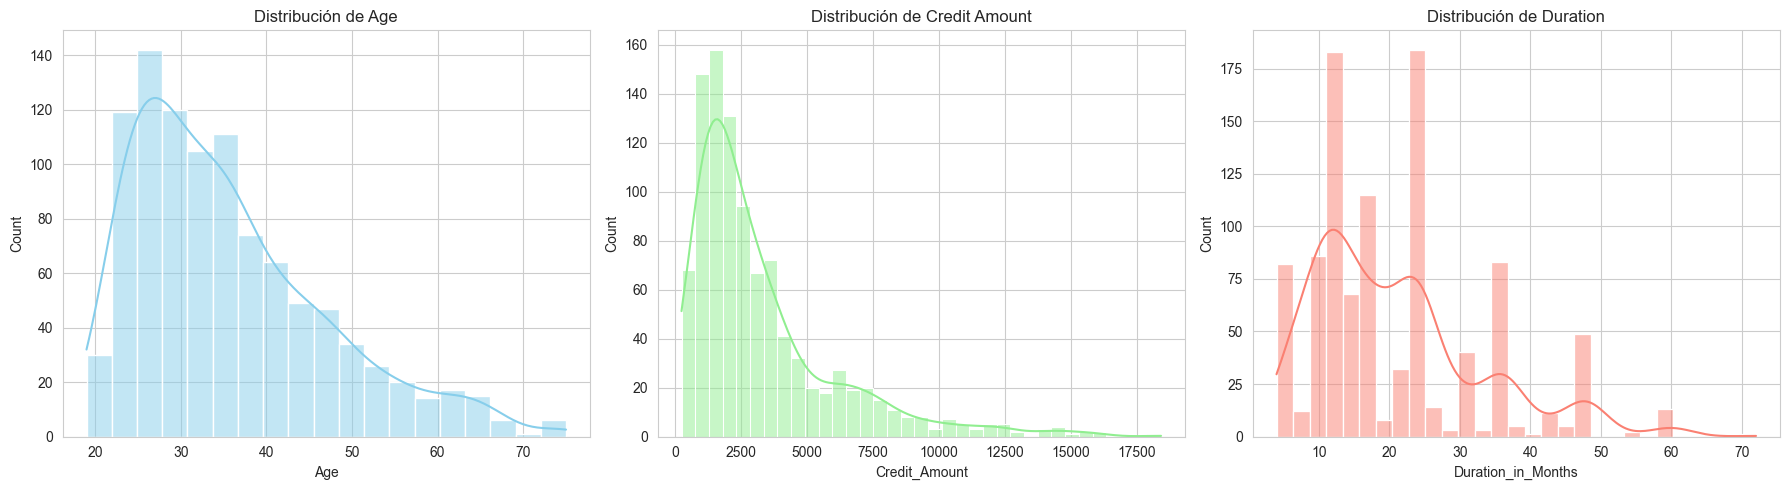

In [12]:
# Gráfica 1: Distribución del Target
plt.figure(figsize=(6, 4))
sns.countplot(x='Target', data=df, palette='viridis')
plt.title('Distribución del Target (0=Good, 1=Bad)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.savefig(os.path.join(REPORT_IMG_DIR, '01_target_dist.png'), dpi=300)
plt.show()


fig, axes = plt.subplots(1, 3, figsize=(18, 5))
# Age
sns.histplot(df['Age'].dropna(), kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribución de Age')
# Credit Amount
sns.histplot(df['Credit_Amount'].dropna(), kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title('Distribución de Credit Amount')
# Duration
sns.histplot(df['Duration_in_Months'].dropna(), kde=True, ax=axes[2], color='salmon')
axes[2].set_title('Distribución de Duration')
plt.tight_layout()
plt.savefig(os.path.join(REPORT_IMG_DIR, '02_num_dist.png'), dpi=300)
plt.show()


## 4. Split de Datos
Train (60%), Validation (20%), Test (20%).

In [15]:

from sklearn.model_selection import train_test_split

X = df.drop(columns=['Target'])
y = df['Target']

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

print(f"Train shapes: X={X_train.shape}, y={y_train.shape}")
print(f"Val shapes:   X={X_val.shape}, y={y_val.shape}")
print(f"Test shapes:  X={X_test.shape}, y={y_test.shape}")

Train shapes: X=(600, 20), y=(600,)
Val shapes:   X=(200, 20), y=(200,)
Test shapes:  X=(200, 20), y=(200,)


## 5. Guardar Procesados

In [ ]:
PROCESSED_DIR = "../data/processed"
os.makedirs(PROCESSED_DIR, exist_ok=True)


train_df = pd.concat([X_train, y_train], axis=1)
val_df = pd.concat([X_val, y_val], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

train_df.to_csv(os.path.join(PROCESSED_DIR, "train.csv"), index=False)
val_df.to_csv(os.path.join(PROCESSED_DIR, "val.csv"), index=False)
test_df.to_csv(os.path.join(PROCESSED_DIR, "test.csv"), index=False)